# Objective

Learn how to perform One Sample Hypothesis Testing using Parametric & Non Parametric methods with the help of Scipy package. The following steps are to be followed for solving a On Sample Test of Means problem.

#### 1. Formulate the Null and Alternate Hypothesis

For example, if you are working at a Piston Manufacturing plant and would like to test the quality of manufactured Pistons by observing the average diameter size of pistons is 20cm. The Null hypothesis would be 

H0 : Population Mean of piston's diameter = 20 cm

and the Alternate Hypothesis would be

H1 : Population Mean of piston's diameter is NOT EQUAL TO 20 cm

#### 2. Collect the sample data for the above Hypothesis and verify if the sample follows a Normal Distribution.

If the Data follows a Normal Distribution, then we could solve the problem using a Parametric One Sample test such as the Student's t-test. Else, we would require the Wilcoxon Test which is better suited for Non Normal Distributions of data.

#### 3. Run the appropriate test (Parametric vs Non Parametric) and observe the p-value of the same.

If p-value >= significance level (generally set at 0.05) , then we would fail to reject the H0

Alternatively, if p-value < significance level (generally set at 0.05) , then we could reject the H0 and prove the H1



### Business Problem

1. Suppose the average annual rainfall for the local area was previously known to be 5 inches. A local Weather Reporter believes there was above average rainfall from 2000 thru 2019 and argues that the average annual rainfall during this period was significantly different from the overall average annual rainfall of 5 inches. The average annual rainfall recorded from 2000 thru 2019 are given below.

Null Hypothesis H0 : Population mean rainfall = 5
    
Alternate Hypothesis H1 : Population mean rainfall > 5

# Load Data

In [1]:
import numpy as np

raw = np.array([[2000,8],
[2001,2],
[2002,5],
[2003,4],
[2004,7],
[2005,4],
[2006,8],
[2007,3],
[2008,4],
[2009,5],
[2010,9],
[2011,2],
[2012,5],
[2013,4],
[2014,5],
[2015,3],
[2016,3],
[2017,5],
[2018,3],
[2019,4]])

data = raw[:,1]

In [2]:
data

array([8, 2, 5, 4, 7, 4, 8, 3, 4, 5, 9, 2, 5, 4, 5, 3, 3, 5, 3, 4])

### Verify Normality Assumption using a histogram - OPTION 1

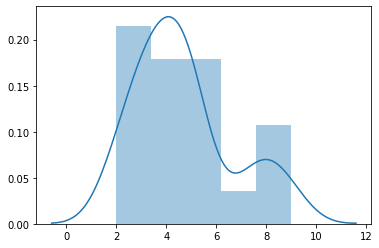

In [3]:
import seaborn as sns

# Look at a histogram

sns.distplot(data)

### Analyze the Normality of data using a Shapiro's test - OPTION 2

The Null & Alternate Hypothesis of Shapiro's test

H0 : Data is Normal
    
H1 : Data is Non Normal

In [4]:
from scipy.stats import shapiro

In [5]:
w_stat , pvalue = shapiro(data)

In [6]:
pvalue

0.035429276525974274

Both the histogram & shapiro's test pvalue confirm that <b>DATA IS NOT NORMAL</b>

Hence, we will follow Non Parametric approach for testing the means

# Modeling

### Importing wilcoxon function for Non Parametric analysis

In [7]:
from scipy.stats import wilcoxon

In [8]:
stat, pvalue = wilcoxon (data - 5, alternative="greater")

In [9]:
pvalue

0.7544405747596636

##### Please note - Wilcoxon test from Scipy is generally used for Non-Parametric paired 2 sample test problems. However, by subtracting the population mean from the sample data, we are creating a workaround to use this function also for a on sample Non Parametric test.

We <b>fail to reject the Null Hypothesis</b> that the Population mean = 5 inches since our p value is greater than significance at 0.05

### Bonus Section

If the data had been Normal and we had to run a Parametric test on the data, the code to be run is as follows

In [10]:
from scipy.stats import ttest_1samp

t_stat , pvalue = ttest_1samp(data, 5)

pvalue

0.43916384972371414

The Parametric test also fails to reject the Null Hypothesis of our model.